# 450EyeViz Exploratory Data Analysis (EDA)

## 1. Defining the problem

### The aim of this project is to demonstrate that you know which appropriate visualization technique(s) to apply for your specific dataset, and that you have implemented the visual objects with appropriate interaction mechanisms. 
### The goal of this project is to provide interactive visualization support to users who are interested in explorative activities, e.g. finding “interesting” things, examine the dataset by exploring whether a particular feature/trend/pattern is present, etc. 
### We have been given one raw dataset capturing the eye gaze data recorded from one participant who has interacted with a given visualization scenario. 
### There are total of 7 text files given to us with two different scenarios: 
 - Graph Interactive Scenario
 - Tree Interactive Scenario
### The 7 files are named as:
 - tree_evd.txt
 - tree_fxd.txt: 
 - tree_gzd.txt
 - graph_evd.txt
 - graph_fxd.txt
 - graph_gzd.txt
 - baseline_gzd.txt
### Types of data:
 - Event data
     - This is the event data of all the buttons and clicks that happened at specific time. The data was recorded for graph interactive and tree intearctive scenario.  It exports the event data for each recording.
 - Fixation data
     - This is the fixation data that gives an idea about fixation points where the participant looked for a certain duration. This data is our main point of focus. It exports one data row per fixation. The validity filter, eye filter and fixation filter settings are used to filter the data. Gaze data that do not belong to any fixation are omitted. Also it was recorded for graph interactive and tree interactive scenario.
 - Gaze data
     - This is the gaze data that was recorded for a particular user. It exports gaze points and it was recorded for tree and graph interactive scenario.
 - Baseline Gaze data
     - This is the data that was recorded in the beginning with a fairly simple interactive scenario. It exports all the gaze points with same parameters as gaze data.

In [108]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
warnings.filterwarnings("ignore")

## 2. Load the data

In [109]:
tree_evd_df = pd.read_csv("data/p7.treeEVD.txt", sep = "\t", header=None)

In [110]:
tree_fxd_df = pd.read_csv("data/p7.treeFXD.txt", sep = "\t", header=None)

In [111]:
tree_gzd_df = pd.read_csv("data/p7.treeGZD.txt", sep = "\t", header=None)

In [112]:
graph_evd_df = pd.read_csv("data/p7.graphEVD.txt", sep = "\t", header=None)

In [113]:
graph_fxd_df = pd.read_csv("data/p7.graphFXD.txt", sep = "\t", header=None)

In [114]:
graph_gzd_df = pd.read_csv("data/p7.graphGZD.txt", sep = "\t", header=None)

In [115]:
baseline_gzd_df =  pd.read_csv("data/p7GZD.txt", sep = "\t", header=None)

## 3. Naming the column labels from text files and examining the data

In [116]:
tree_evd_df.rename(columns = {0:'time', 
                     1: 'event', 
                     2: 'event_key', 
                     3: 'data1', 
                     4: 'data2',
                     5:'description'}, inplace = True)

In [117]:
tree_evd_df.head(10)

,time,event,event_key,data1,data2,description
0,9132,LMouseButton,1,42,596,NaN
1,10707,LMouseButton,1,41,596,NaN
2,15133,LMouseButton,1,40,551,NaN
3,16728,LMouseButton,1,94,575,NaN
4,21493,LMouseButton,1,672,533,NaN
5,25301,LMouseButton,1,699,597,NaN
6,26577,LMouseButton,1,699,597,NaN
7,28032,LMouseButton,1,694,629,NaN
8,28710,LMouseButton,1,694,628,NaN
9,30265,LMouseButton,1,693,584,NaN


In [118]:
tree_fxd_df.rename(columns = {0:'number', 
                     1: 'time', 
                     2: 'duration', 
                     3: 'screen_x', 
                     4: 'secrren_y'}, inplace = True)

In [119]:
tree_fxd_df.head(10)

,number,time,duration,screen_x,secrren_y
0,1,140,100,721,378
1,2,280,439,689,523
2,3,938,179,387,327
3,4,1137,219,229,214
4,5,1775,179,63,527
5,6,2094,279,629,496
6,7,2453,139,527,285
7,8,2653,179,322,186
8,9,2852,578,252,214
9,10,3450,279,67,189


In [120]:
tree_gzd_df.rename(columns ={0:'time', 
                     1: 'number', 
                     2: 'screen_x_left_eye', 
                     3: 'screen_y_left_eye', 
                     4: 'cam_x_left_eye',
                     5:'cam_y_left_eye',
                     6:'distance_left_eye',
                     7:'pupil_left_eye',
                     8:'code_left_eye', 
                    9:'screen_x_right_eye', 
                    10:'screen_y_right_eye',
                    11:'cam_x_rigth_eye',
                    12:'cam_y_right_eye',
                    13:'distance_right_eye', 
                    14:'pupil_right_eye', 
                    15:'code_right_eye'},inplace = True)

In [121]:
tree_gzd_df.head(10)

,time,number,screen_x_left_eye,screen_y_left_eye,cam_x_left_eye,cam_y_left_eye,distance_left_eye,pupil_left_eye,code_left_eye,screen_x_right_eye,screen_y_right_eye,cam_x_rigth_eye,cam_y_right_eye,distance_right_eye,pupil_right_eye,code_right_eye
0,1,1,-1280,-1024,-1.000,-1.000,-1.000,-1.000,4,-1280,-1024,-1.000,-1.000,-1.000,-1.000,4
1,21,2,-1280,-1024,0.839,0.357,-1.000,-1.000,4,-1280,-1024,0.591,0.349,-1.000,-1.000,4
2,41,3,-1280,-1024,-1.000,-1.000,-1.000,-1.000,4,-1280,-1024,-1.000,-1.000,-1.000,-1.000,4
3,61,4,714,355,0.839,0.357,725.477,3.568,0,721,383,0.592,0.348,717.785,3.393,0
4,81,5,723,392,0.839,0.357,725.477,3.582,0,721,369,0.592,0.348,717.785,3.389,0
5,101,6,700,345,0.839,0.357,725.477,3.614,0,721,376,0.592,0.348,717.785,3.444,0
6,121,7,699,357,0.839,0.357,723.993,3.626,0,720,363,0.592,0.348,720.354,3.473,0
7,140,8,-1280,-1024,0.591,0.349,-1.000,-1.000,4,714,394,0.591,0.349,720.354,3.356,0
8,160,9,733,403,0.840,0.357,723.993,3.539,0,718,392,0.592,0.348,720.354,3.383,0
9,180,10,726,386,0.840,0.357,723.993,3.639,0,715,380,0.592,0.348,720.354,3.387,0


In [122]:
graph_evd_df.rename(columns = {0:'time', 
                     1: 'event', 
                     2: 'event_key', 
                     3: 'data1', 
                     4: 'data2',
                     5:'description'}, inplace = True)

In [123]:
graph_evd_df.head(10)

,time,event,event_key,data1,data2,description
0,4379,LMouseButton,1,407,371,NaN
1,7799,LMouseButton,1,391,873,NaN
2,11338,LMouseButton,1,609,236,NaN
3,15954,LMouseButton,1,504,506,NaN
4,16671,LMouseButton,1,504,506,NaN
5,21476,LMouseButton,1,421,532,NaN
6,23939,LMouseButton,1,453,458,NaN
7,33629,LMouseButton,1,1220,4,NaN
8,35583,LMouseButton,1,975,354,NaN
9,39441,LMouseButton,1,936,776,NaN


In [124]:
graph_fxd_df.rename(columns = {0:'number', 
                     1: 'time', 
                     2: 'duration', 
                     3: 'screen_x', 
                     4: 'secrren_y'}, inplace = True)

In [125]:
graph_fxd_df.head(10)

,number,time,duration,screen_x,secrren_y
0,1,172,120,721,344
1,2,491,100,709,360
2,3,790,100,680,432
3,4,930,140,679,439
4,5,1169,100,668,428
5,6,1628,219,569,1012
6,7,3063,100,163,301
7,8,3183,199,186,369
8,9,3462,279,389,333
9,10,3761,618,389,330


In [126]:
graph_gzd_df.rename(columns ={0:'time', 
                     1: 'number', 
                     2: 'screen_x_left_eye', 
                     3: 'screen_y_left_eye', 
                     4: 'cam_x_left_eye',
                     5:'cam_y_left_eye',
                     6:'distance_left_eye',
                     7:'pupil_left_eye',
                     8:'code_left_eye', 
                    9:'screen_x_right_eye', 
                    10:'screen_y_right_eye',
                    11:'cam_x_rigth_eye',
                    12:'cam_y_right_eye',
                    13:'distance_right_eye', 
                    14:'pupil_right_eye', 
                    15:'code_right_eye'},inplace = True)

In [127]:
graph_gzd_df.head(10)

,time,number,screen_x_left_eye,screen_y_left_eye,cam_x_left_eye,cam_y_left_eye,distance_left_eye,pupil_left_eye,code_left_eye,screen_x_right_eye,screen_y_right_eye,cam_x_rigth_eye,cam_y_right_eye,distance_right_eye,pupil_right_eye,code_right_eye
0,13,1,719,341,0.790,0.36,823.636,3.878,0,716,415,0.572,0.357,815.676,3.955,0
1,33,2,-1280,-1024,-1.000,-1.00,-1.000,-1.000,4,-1280,-1024,-1.000,-1.000,-1.000,-1.000,4
2,53,3,-1280,-1024,0.790,0.36,-1.000,-1.000,4,-1280,-1024,0.571,0.357,-1.000,-1.000,4
3,73,4,735,317,0.789,0.36,822.784,3.910,0,721,380,0.571,0.357,815.850,3.730,0
4,93,5,724,326,0.790,0.36,822.784,3.940,0,707,352,0.572,0.357,815.850,3.897,0
5,113,6,728,371,0.790,0.36,822.784,3.960,0,699,375,0.571,0.357,815.850,3.763,0
6,133,7,768,338,0.790,0.36,822.784,3.999,0,704,370,0.571,0.357,815.850,3.797,0
7,153,8,785,357,0.789,0.36,822.722,4.025,0,700,357,0.570,0.357,818.286,3.864,0
8,172,9,706,337,0.789,0.36,822.722,3.899,0,706,401,0.570,0.357,818.286,3.808,0
9,192,10,722,351,0.789,0.36,822.722,3.937,0,717,393,0.571,0.357,818.286,3.778,0


In [128]:
baseline_gzd_df.rename(columns ={0:'time', 
                     1: 'number', 
                     2: 'screen_x_left_eye', 
                     3: 'screen_y_left_eye', 
                     4: 'cam_x_left_eye',
                     5:'cam_y_left_eye',
                     6:'distance_left_eye',
                     7:'pupil_left_eye',
                     8:'code_left_eye', 
                    9:'screen_x_right_eye', 
                    10:'screen_y_right_eye',
                    11:'cam_x_rigth_eye',
                    12:'cam_y_right_eye',
                    13:'distance_right_eye', 
                    14:'pupil_right_eye', 
                    15:'code_right_eye'},inplace = True)

In [129]:
baseline_gzd_df.head(10)

,time,number,screen_x_left_eye,screen_y_left_eye,cam_x_left_eye,cam_y_left_eye,distance_left_eye,pupil_left_eye,code_left_eye,screen_x_right_eye,screen_y_right_eye,cam_x_rigth_eye,cam_y_right_eye,distance_right_eye,pupil_right_eye,code_right_eye
0,11,1,-1280,-1024,0.821,0.354,-1.000,-1.000,4,-1280,-1024,0.597,0.346,-1.000,-1.000,4
1,31,2,-1280,-1024,-1.000,-1.000,-1.000,-1.000,4,-1280,-1024,-1.000,-1.000,-1.000,-1.000,4
2,51,3,829,629,0.821,0.354,801.303,4.093,0,811,554,0.597,0.345,793.760,3.947,0
3,71,4,815,670,0.821,0.354,801.303,4.271,0,809,542,0.597,0.345,793.760,3.941,0
4,91,5,834,585,0.821,0.354,801.303,4.039,0,804,532,0.597,0.345,793.760,3.975,0
5,111,6,831,587,0.821,0.354,799.224,4.070,0,810,517,0.597,0.345,797.243,3.999,0
6,150,7,802,575,0.821,0.354,799.224,3.985,0,830,520,0.597,0.345,797.243,3.891,0
7,152,8,797,550,0.821,0.354,799.224,3.966,0,822,517,0.597,0.345,797.243,3.906,0
8,171,9,818,600,0.821,0.354,799.224,4.005,0,817,537,0.597,0.346,797.243,3.944,0
9,191,10,857,603,0.822,0.354,799.224,4.224,0,798,526,0.597,0.346,797.243,3.921,0


In [130]:
baseline_gzd_df= baseline_gzd_df.loc[((baseline_gzd_df['code_left_eye'] == 0) & (baseline_gzd_df['code_right_eye'] == 0))]

In [131]:
baseline_gzd_df.head(10)

,time,number,screen_x_left_eye,screen_y_left_eye,cam_x_left_eye,cam_y_left_eye,distance_left_eye,pupil_left_eye,code_left_eye,screen_x_right_eye,screen_y_right_eye,cam_x_rigth_eye,cam_y_right_eye,distance_right_eye,pupil_right_eye,code_right_eye
2,51,3,829,629,0.821,0.354,801.303,4.093,0,811,554,0.597,0.345,793.760,3.947,0
3,71,4,815,670,0.821,0.354,801.303,4.271,0,809,542,0.597,0.345,793.760,3.941,0
4,91,5,834,585,0.821,0.354,801.303,4.039,0,804,532,0.597,0.345,793.760,3.975,0
5,111,6,831,587,0.821,0.354,799.224,4.070,0,810,517,0.597,0.345,797.243,3.999,0
6,150,7,802,575,0.821,0.354,799.224,3.985,0,830,520,0.597,0.345,797.243,3.891,0
7,152,8,797,550,0.821,0.354,799.224,3.966,0,822,517,0.597,0.345,797.243,3.906,0
8,171,9,818,600,0.821,0.354,799.224,4.005,0,817,537,0.597,0.346,797.243,3.944,0
9,191,10,857,603,0.822,0.354,799.224,4.224,0,798,526,0.597,0.346,797.243,3.921,0
10,211,11,863,604,0.822,0.354,801.378,4.256,0,789,534,0.597,0.346,794.755,3.926,0
11,231,12,822,586,0.822,0.354,801.378,4.114,0,811,540,0.597,0.346,794.755,3.863,0


## 4. Determining length and datatypes of all frames

In [132]:
tree_evd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 6 columns):
time           447 non-null int64
event          447 non-null object
event_key      447 non-null int64
data1          447 non-null int64
data2          447 non-null int64
description    82 non-null object
dtypes: int64(4), object(2)
memory usage: 21.0+ KB


In [133]:
tree_fxd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2711 entries, 0 to 2710
Data columns (total 5 columns):
number       2711 non-null int64
time         2711 non-null int64
duration     2711 non-null int64
screen_x     2711 non-null int64
secrren_y    2711 non-null int64
dtypes: int64(5)
memory usage: 106.0 KB


In [134]:
tree_gzd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50784 entries, 0 to 50783
Data columns (total 16 columns):
time                  50784 non-null int64
number                50784 non-null int64
screen_x_left_eye     50784 non-null int64
screen_y_left_eye     50784 non-null int64
cam_x_left_eye        50784 non-null float64
cam_y_left_eye        50784 non-null float64
distance_left_eye     50784 non-null float64
pupil_left_eye        50784 non-null float64
code_left_eye         50784 non-null int64
screen_x_right_eye    50784 non-null int64
screen_y_right_eye    50784 non-null int64
cam_x_rigth_eye       50784 non-null float64
cam_y_right_eye       50784 non-null float64
distance_right_eye    50784 non-null float64
pupil_right_eye       50784 non-null float64
code_right_eye        50784 non-null int64
dtypes: float64(8), int64(8)
memory usage: 6.2 MB


In [135]:
graph_evd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 6 columns):
time           377 non-null int64
event          377 non-null object
event_key      377 non-null int64
data1          377 non-null int64
data2          377 non-null int64
description    0 non-null float64
dtypes: float64(1), int64(4), object(1)
memory usage: 17.8+ KB


In [136]:
graph_fxd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2467 entries, 0 to 2466
Data columns (total 5 columns):
number       2467 non-null int64
time         2467 non-null int64
duration     2467 non-null int64
screen_x     2467 non-null int64
secrren_y    2467 non-null int64
dtypes: int64(5)
memory usage: 96.4 KB


In [137]:
graph_gzd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60529 entries, 0 to 60528
Data columns (total 16 columns):
time                  60529 non-null int64
number                60529 non-null int64
screen_x_left_eye     60529 non-null int64
screen_y_left_eye     60529 non-null int64
cam_x_left_eye        60529 non-null float64
cam_y_left_eye        60529 non-null float64
distance_left_eye     60529 non-null float64
pupil_left_eye        60529 non-null float64
code_left_eye         60529 non-null int64
screen_x_right_eye    60529 non-null int64
screen_y_right_eye    60529 non-null int64
cam_x_rigth_eye       60529 non-null float64
cam_y_right_eye       60529 non-null float64
distance_right_eye    60529 non-null float64
pupil_right_eye       60529 non-null float64
code_right_eye        60529 non-null int64
dtypes: float64(8), int64(8)
memory usage: 7.4 MB


In [138]:
baseline_gzd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474 entries, 2 to 503
Data columns (total 16 columns):
time                  474 non-null int64
number                474 non-null int64
screen_x_left_eye     474 non-null int64
screen_y_left_eye     474 non-null int64
cam_x_left_eye        474 non-null float64
cam_y_left_eye        474 non-null float64
distance_left_eye     474 non-null float64
pupil_left_eye        474 non-null float64
code_left_eye         474 non-null int64
screen_x_right_eye    474 non-null int64
screen_y_right_eye    474 non-null int64
cam_x_rigth_eye       474 non-null float64
cam_y_right_eye       474 non-null float64
distance_right_eye    474 non-null float64
pupil_right_eye       474 non-null float64
code_right_eye        474 non-null int64
dtypes: float64(8), int64(8)
memory usage: 63.0 KB


## 5. Summarizing categorical and numerical data

In [139]:
tree_evd_df.describe(include = [np.number])

,time,event_key,data1,data2
count,4.470000e+02,447.000000,447.000000,447.000000
mean,5.375557e+05,1.371365,353.295302,404.463087
std,2.845677e+05,0.778572,294.615867,248.584157
min,9.132000e+03,1.000000,8.000000,0.000000
25%,3.323540e+05,1.000000,65.000000,229.000000
50%,5.264310e+05,1.000000,276.000000,551.000000
75%,8.224755e+05,1.000000,675.000000,604.000000
max,1.001852e+06,3.000000,1266.000000,805.000000


In [140]:
tree_evd_df.describe(include = ['O'])

,event,description
count,447,82
unique,2,23
top,LMouseButton,LShiftKey
freq,364,16


In [141]:
tree_fxd_df.describe(include = [np.number])

,number,time,duration,screen_x,secrren_y
count,2711.000000,2.711000e+03,2711.000000,2711.000000,2711.000000
mean,1356.000000,5.005788e+05,248.336407,397.168941,511.854666
std,782.742614,2.919408e+05,188.012508,313.497938,185.133665
min,1.000000,1.400000e+02,100.000000,-21.000000,-3.000000
25%,678.500000,2.409355e+05,140.000000,73.000000,280.500000
50%,1356.000000,5.060740e+05,180.000000,416.000000,580.000000
75%,2033.500000,7.493715e+05,279.000000,717.000000,631.000000
max,2711.000000,1.006864e+06,2074.000000,1286.000000,859.000000


In [142]:
tree_gzd_df.describe(include = [np.number])

,time,number,screen_x_left_eye,screen_y_left_eye,cam_x_left_eye,cam_y_left_eye,distance_left_eye,pupil_left_eye,code_left_eye,screen_x_right_eye,screen_y_right_eye,cam_x_rigth_eye,cam_y_right_eye,distance_right_eye,pupil_right_eye,code_right_eye
count,5.078400e+04,50784.000000,50784.000000,50784.000000,50784.000000,50784.000000,50784.000000,50784.000000,50784.000000,50784.000000,50784.000000,50784.000000,50784.000000,50784.000000,50784.000000,50784.000000
mean,5.064444e+05,25392.500000,290.388075,411.522271,0.752270,0.591502,692.722075,3.394180,0.265162,265.946007,390.472531,0.531534,0.563278,681.725718,3.219831,0.268077
std,2.923838e+05,14660.222372,517.120951,424.185892,0.390364,0.401760,188.247153,1.195589,0.994633,514.067024,423.100159,0.342286,0.395596,185.754917,1.144866,0.999699
min,1.000000e+00,1.000000,-2383.000000,-1261.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1280.000000,-3468.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.532620e+05,12696.750000,80.000000,254.000000,0.821000,0.374000,709.448000,3.586000,0.000000,43.000000,227.000000,0.577000,0.346000,701.452000,3.406000,0.000000
50%,5.064630e+05,25392.500000,253.000000,574.000000,0.839000,0.794000,750.680000,3.669000,0.000000,251.000000,556.000000,0.604000,0.759000,737.389000,3.493000,0.000000
75%,7.596440e+05,38088.250000,720.000000,635.000000,0.859000,0.823000,764.616000,3.759000,0.000000,694.000000,618.000000,0.626000,0.791000,751.553250,3.584000,0.000000
max,1.012826e+06,50784.000000,1424.000000,1393.000000,0.996000,0.977000,934.936000,11.711000,4.000000,2463.000000,1690.000000,0.973000,0.977000,922.191000,11.233000,4.000000


In [143]:
graph_evd_df.describe(include = [np.number])

,time,event_key,data1,data2,description
count,3.770000e+02,377.0,377.000000,377.000000,0.0
mean,5.819473e+05,1.0,617.912467,579.209549,NaN
std,3.280390e+05,0.0,175.300579,172.719444,NaN
min,4.379000e+03,1.0,17.000000,4.000000,NaN
25%,3.296210e+05,1.0,497.000000,486.000000,NaN
50%,5.581510e+05,1.0,598.000000,606.000000,NaN
75%,8.633760e+05,1.0,727.000000,710.000000,NaN
max,1.205784e+06,1.0,1220.000000,999.000000,NaN


In [144]:
graph_evd_df.describe(include = ['O'])

,event
count,377
unique,1
top,LMouseButton
freq,377


In [145]:
graph_fxd_df.describe(include = [np.number])

,number,time,duration,screen_x,secrren_y
count,2467.00000,2.467000e+03,2467.000000,2467.000000,2467.000000
mean,1234.00000,5.460600e+05,226.705310,644.154439,548.804621
std,712.30588,2.995121e+05,151.664807,225.457970,181.123275
min,1.00000,1.720000e+02,100.000000,-32.000000,-50.000000
25%,617.50000,3.111175e+05,139.000000,501.000000,435.000000
50%,1234.00000,5.653600e+05,179.000000,637.000000,560.000000
75%,1850.50000,7.750525e+05,279.000000,805.000000,683.000000
max,2467.00000,1.205832e+06,1914.000000,1391.000000,1220.000000


In [146]:
graph_gzd_df.describe(include = [np.number])

,time,number,screen_x_left_eye,screen_y_left_eye,cam_x_left_eye,cam_y_left_eye,distance_left_eye,pupil_left_eye,code_left_eye,screen_x_right_eye,screen_y_right_eye,cam_x_rigth_eye,cam_y_right_eye,distance_right_eye,pupil_right_eye,code_right_eye
count,6.052900e+04,60529.000000,60529.000000,60529.000000,60529.000000,60529.000000,60529.000000,60529.000000,60529.000000,60529.000000,60529.000000,60529.000000,60529.000000,60529.000000,60529.000000,60529.000000
mean,6.038565e+05,30265.000000,79.870756,-1.692495,0.352220,0.132261,453.553244,2.045334,2.154901,53.915082,68.181120,0.256617,0.123145,472.286249,2.123982,1.484148
std,3.483966e+05,17473.361559,991.263913,747.087518,0.873972,0.767573,328.688040,2.181133,1.779112,899.083380,735.938334,0.817691,0.758746,316.348649,2.065949,1.709716
min,1.300000e+01,1.000000,-1280.000000,-1024.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1280.000000,-1547.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,3.021660e+05,15133.000000,-1280.000000,-1024.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1280.000000,-1024.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,6.038600e+05,30265.000000,625.000000,369.000000,0.914000,0.344000,613.804000,3.406000,3.000000,508.000000,452.000000,0.683000,0.344000,614.854000,3.357000,1.000000
75%,9.055740e+05,45397.000000,826.000000,602.000000,0.947000,0.859000,731.646000,3.671000,4.000000,717.000000,629.000000,0.768000,0.839000,722.961000,3.522000,4.000000
max,1.207268e+06,60529.000000,5159.000000,1509.000000,0.999000,0.995000,895.047000,11.706000,4.000000,1592.000000,1658.000000,0.999000,0.996000,895.047000,8.791000,4.000000


In [147]:
baseline_gzd_df.describe(include = [np.number])

,time,number,screen_x_left_eye,screen_y_left_eye,cam_x_left_eye,cam_y_left_eye,distance_left_eye,pupil_left_eye,code_left_eye,screen_x_right_eye,screen_y_right_eye,cam_x_rigth_eye,cam_y_right_eye,distance_right_eye,pupil_right_eye,code_right_eye
count,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.0,474.000000,474.000000,474.000000,474.000000,474.000000,474.000000,474.0
mean,5027.021097,251.599156,379.069620,283.348101,0.815542,0.370958,831.951230,3.688890,0.0,406.502110,253.189873,0.600215,0.358205,824.772268,3.613177,0.0
std,2888.363061,144.835329,294.018454,230.201573,0.010189,0.017950,27.612257,0.201527,0.0,276.546356,226.054321,0.007047,0.015270,26.321521,0.228825,0.0
min,51.000000,3.000000,-38.000000,-209.000000,0.794000,0.329000,797.194000,3.202000,0.0,24.000000,-71.000000,0.582000,0.316000,787.140000,3.129000,0.0
25%,2528.000000,126.250000,161.250000,88.000000,0.808000,0.353000,803.991000,3.550500,0.0,206.000000,51.250000,0.598000,0.344000,797.390000,3.421500,0.0
50%,5065.000000,253.500000,294.000000,178.000000,0.816500,0.376000,828.521000,3.720000,0.0,329.500000,151.000000,0.600000,0.362000,822.251000,3.666000,0.0
75%,7503.000000,375.750000,670.000000,497.000000,0.824000,0.387000,855.248000,3.826750,0.0,681.250000,471.000000,0.604000,0.371000,848.365000,3.751000,0.0
max,10060.000000,504.000000,1031.000000,753.000000,0.830000,0.408000,907.809000,4.271000,0.0,1030.000000,740.000000,0.614000,0.388000,880.881000,4.567000,0.0


## 6. Visualizing relationship between variables

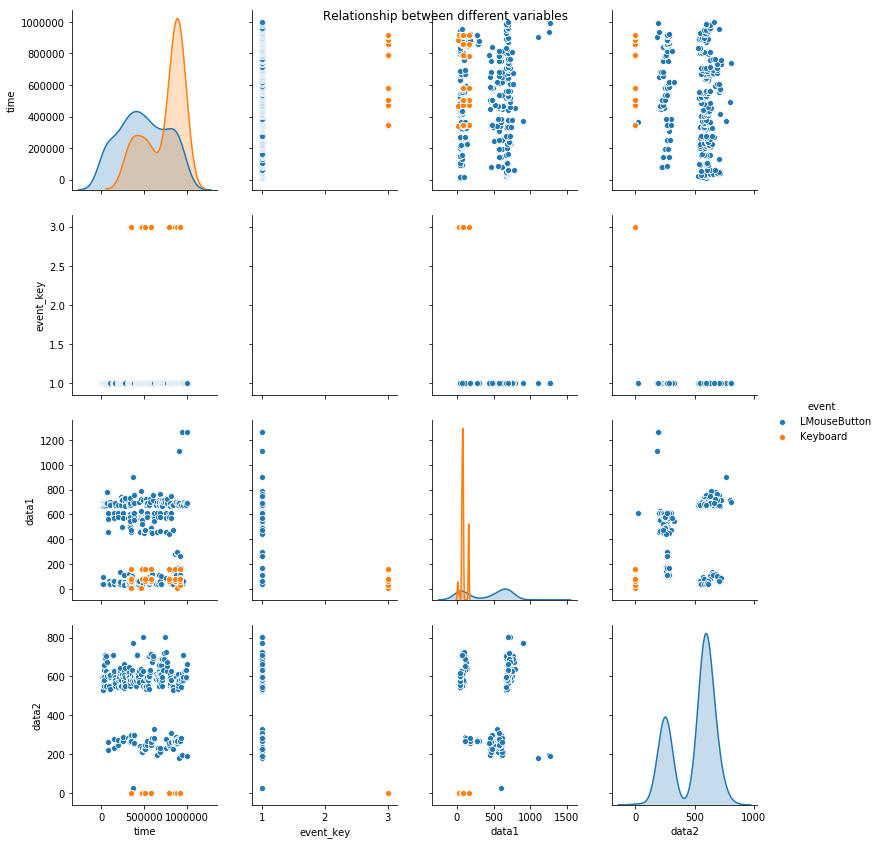

In [148]:
pair_plt = sns.pairplot(tree_evd_df, hue = 'event');
pair_plt.fig.set_figheight(12);
pair_plt.fig.set_figwidth(12);
pair_plt.fig.suptitle("Relationship between different variables");

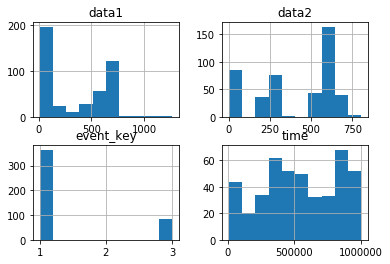

In [149]:
tree_evd_df.hist();

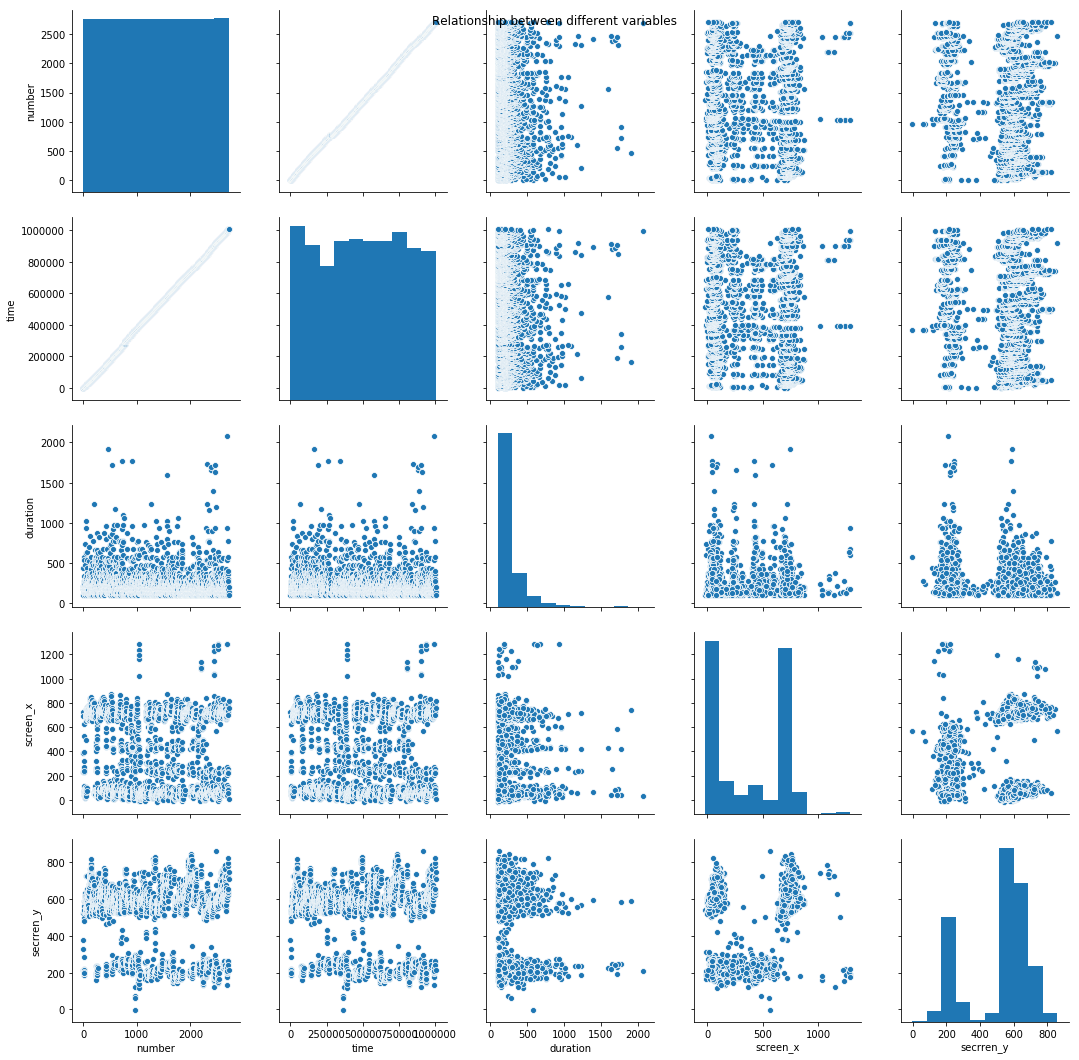

In [150]:
pair_plt = sns.pairplot(tree_fxd_df);
pair_plt.fig.set_figheight(15);
pair_plt.fig.set_figwidth(15);
pair_plt.fig.suptitle("Relationship between different variables");

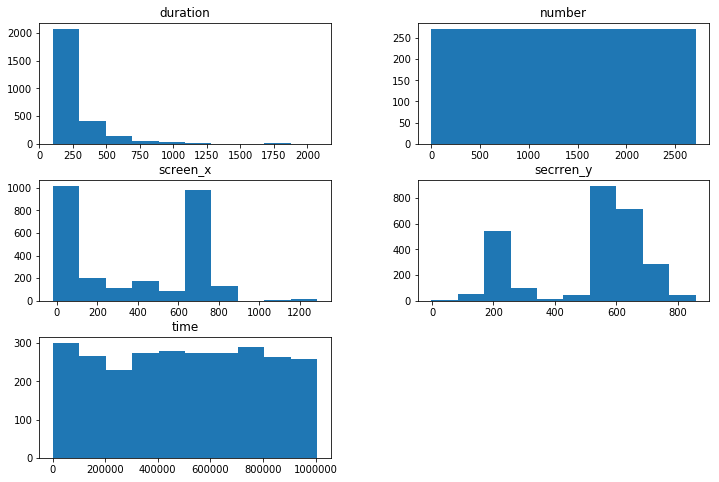

In [151]:
tree_fxd_df.hist(grid=False, figsize=(12,8));

## 7. Extracting relevant data for appropriate visualization. Dropping columns that are not relevant

 - In the data descripton we were given the validity code for the columns in **code_left_eye** and **code_right_eye**. The only data we are considering is when **code_left_eye=0** and **code_right_eye=0**. This will give us valid pupil size and also help establish relation with the baseline.
 - Also, we will be droping all the columns except **number**, **time**,**pupil size**.

In [152]:
final_df_tree = tree_gzd_df.loc[((tree_gzd_df['code_left_eye'] == 0) & (tree_gzd_df['code_right_eye'] == 0))]

In [153]:
# Dropping the columns that are irrelevant to our Visualisation
final_df_tree = final_df_tree.drop(['screen_x_left_eye','screen_y_left_eye','cam_x_left_eye','cam_y_left_eye',
                                    'distance_left_eye','screen_x_right_eye','screen_y_right_eye','cam_x_rigth_eye', 
                                    'cam_y_right_eye', 'distance_right_eye'],axis = 1)

In [154]:
final_df_tree.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46697 entries, 3 to 50589
Data columns (total 6 columns):
time               46697 non-null int64
number             46697 non-null int64
pupil_left_eye     46697 non-null float64
code_left_eye      46697 non-null int64
pupil_right_eye    46697 non-null float64
code_right_eye     46697 non-null int64
dtypes: float64(2), int64(4)
memory usage: 2.5 MB


In [155]:
final_df_graph = graph_gzd_df.loc[((graph_gzd_df['code_left_eye'] == 0) & (graph_gzd_df['code_right_eye'] == 0))]

In [156]:
final_df_graph = final_df_graph.drop(['screen_x_left_eye','screen_y_left_eye','cam_x_left_eye','cam_y_left_eye',
                     'distance_left_eye','screen_x_right_eye','screen_y_right_eye','cam_x_rigth_eye', 
                     'cam_y_right_eye', 'distance_right_eye'],axis = 1)

In [157]:
final_df_graph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23541 entries, 0 to 60439
Data columns (total 6 columns):
time               23541 non-null int64
number             23541 non-null int64
pupil_left_eye     23541 non-null float64
code_left_eye      23541 non-null int64
pupil_right_eye    23541 non-null float64
code_right_eye     23541 non-null int64
dtypes: float64(2), int64(4)
memory usage: 1.3 MB


In [158]:
# chceking for negative values of pupil size in final_df_tree
neg_left_tree = sum(n<0 for n in final_df_tree['pupil_left_eye'].values.flatten())
neg_right_tree = sum(n<0 for n in final_df_tree['pupil_right_eye'].values.flatten())
print('The negative values in final_tree_df for pupil_left_eye and pupil_right_eye are {} and {}'
            .format(neg_left_tree,neg_right_tree))

The negative values in final_tree_df for pupil_left_eye and pupil_right_eye are 3 and 0


In [159]:
# chceking for negative values of pupil size in final_df_graph
neg_left_graph = sum(n<0 for n in final_df_graph['pupil_left_eye'].values.flatten())
neg_right_graph = sum(n<0 for n in final_df_graph['pupil_right_eye'].values.flatten())
print('The negative values in final_tree_df for pupil_left_eye and pupil_right_eye are {} and {}'
            .format(neg_left_graph,neg_right_graph))

The negative values in final_tree_df for pupil_left_eye and pupil_right_eye are 2 and 0


In [160]:
neg_data_tree = final_df_tree[(final_df_tree['pupil_left_eye']<0)]

In [161]:
neg_data_tree

,time,number,pupil_left_eye,code_left_eye,pupil_right_eye,code_right_eye
7545,150569,7546,-1.0,0,5.797,0
34663,691334,34664,-1.0,0,5.843,0
34773,693527,34774,-1.0,0,7.026,0


In [162]:
neg_data_graph = final_df_graph[(final_df_graph['pupil_left_eye']<0)]

In [163]:
neg_data_graph

,time,number,pupil_left_eye,code_left_eye,pupil_right_eye,code_right_eye
37435,746831,37436,-1.0,0,6.350,0
37436,746851,37437,-1.0,0,6.364,0


#### As we can see there are some negative values corresponding to the valid code_left_eye.

## 8. Data Cleaning
 - First step in the process would be to remove rows corresponding to negative values in **pupil_left_eye** for both the scenarios.
 - Secondly, for average dilation we will be calculating the average of **pupil_left_eye** and **pupil_right_eye** in the baseline data.
 - Next, we will be calculating the average of **pupil_left_eye** and **pupil_right_eye** in the tree interactive scenarion and graph interactive scenario from the baseline data.
 - Lastly, we would be subtracting average of **pupil_left_eye** and **pupil_right_eye** in the tree interactive scenarion and graph interactive scenario from the baseline data to get **avg_dilation** .

In [164]:
# Dropping the negative values of pupil_left_eye from tree dataframe
final_df_tree = final_df_tree[final_df_tree.pupil_left_eye > 0]

In [165]:
# checking the number of null values 
final_df_tree['pupil_left_eye'].isnull().value_counts()

False    46694
Name: pupil_left_eye, dtype: int64

In [166]:
# Dropping the negative values of pupil_left_eye from graph dataframe
final_df_graph = final_df_graph[final_df_graph.pupil_left_eye> 0]

In [167]:
# Checking the number of null values
final_df_graph['pupil_left_eye'].isnull().value_counts()

False    23539
Name: pupil_left_eye, dtype: int64

In [168]:
# Calculating the mean of pupil size in baseline data
baseline_left_eye_mean  = baseline_gzd_df['pupil_left_eye'].mean()
baseline_right_eye_mean = baseline_gzd_df['pupil_right_eye'].mean()

In [195]:
# Calualting the average pupil size in baseline data
average_pupil_size_baseline = (baseline_left_eye_mean+baseline_right_eye_mean)/2
print('The average pupil size of the baseline data is {}'.format(average_pupil_size_baseline))

The average pupil size of the baseline data is 3.651033755274264


In [170]:
# Calculating  average pupil dilation size of tree gaze data from pupil_left_eye and pupilt_right_eye of tree gaze data
final_df_tree['avg_dilation'] = final_df_tree[['pupil_left_eye', 'pupil_right_eye']].mean(axis=1)

In [171]:
#Subtracting the avg_dilation from the baseline data
final_df_tree['avg_dilation'] = abs(final_df_tree['avg_dilation']-average_pupil_size_baseline)

In [172]:
final_df_tree.head(10)

,time,number,pupil_left_eye,code_left_eye,pupil_right_eye,code_right_eye,avg_dilation
3,61,4,3.568,0,3.393,0,0.170534
4,81,5,3.582,0,3.389,0,0.165534
5,101,6,3.614,0,3.444,0,0.122034
6,121,7,3.626,0,3.473,0,0.101534
8,160,9,3.539,0,3.383,0,0.190034
9,180,10,3.639,0,3.387,0,0.138034
10,200,11,3.679,0,3.475,0,0.074034
11,220,12,3.726,0,3.490,0,0.043034
13,260,14,3.586,0,3.417,0,0.149534
14,280,15,3.645,0,3.511,0,0.073034


In [174]:
# Calculating  average pupil dilation size of graph gaze data from pupil_left_eye and pupilt_right_eye of graph gaze data
final_df_graph['avg_dilation'] = final_df_graph[['pupil_left_eye', 'pupil_right_eye']].mean(axis=1)

In [175]:
#Subtracting the avg_dilation from the baseline data
final_df_graph['avg_dilation'] = abs(final_df_graph['avg_dilation'] - average_pupil_size_baseline)

In [176]:
final_df_graph.head(10)

,time,number,pupil_left_eye,code_left_eye,pupil_right_eye,code_right_eye,avg_dilation
0,13,1,3.878,0,3.955,0,0.265466
3,73,4,3.910,0,3.730,0,0.168966
4,93,5,3.940,0,3.897,0,0.267466
5,113,6,3.960,0,3.763,0,0.210466
6,133,7,3.999,0,3.797,0,0.246966
7,153,8,4.025,0,3.864,0,0.293466
8,172,9,3.899,0,3.808,0,0.202466
9,192,10,3.937,0,3.778,0,0.206466
10,212,11,3.893,0,3.719,0,0.154966
11,232,12,3.999,0,3.897,0,0.296966


## 9. Final data preparation for visualization
 - Dropping the columns that ae not usefuil in viaulization from **final_tree_df** and **final_graph_df**
 - Exporting the **tree_fxd_df**, **graph_fxd_df**, **final_df_tree** and **final_df_graph** to csv for visualization using d3 in **data_preprocessed** folder.

In [179]:
final_df_tree = final_df_tree.drop(['pupil_left_eye','code_left_eye','pupil_right_eye','code_right_eye'], axis = 1)

In [180]:
final_df_graph = final_df_graph.drop(['pupil_left_eye','code_left_eye','pupil_right_eye','code_right_eye'], axis = 1)

In [191]:
final_df_tree.to_csv('C:/Users/admin/450EyeViz/data_preprocessed/tree_gaze.csv', index = False)

In [192]:
final_df_graph.to_csv('C:/Users/admin/450EyeViz/data_preprocessed/tree_fixation_points.csv', index = False)

In [194]:
tree_fxd_df.to_csv('C:/Users/admin/450EyeViz/data_preprocessed/graph_fixation_points.csv', index = False)